# 1. 라이브러리로 손쉽게 해외 데이터를 입수하는 방법 
외부 데이터를 크롤링 하는 방법은 여러가지가 있을 수 있는데, 별도의 개발 없이 매우 간단하게, 패키지를 통해서 데이터를 입수 할 수 있는 방법을 먼저 FRED (Fedral Reserve Bank of st.Louis)의 예를 들어서 설명하도록 하겠습니다. 

1. https://fred.stlouisfed.org/ 에 접속합니다.
2. 우측 상단의 Search Fred 에 검색하고자 하는 대상을 검색합니다 

   (여기서는 Korea Customer Price Index 를 검색하였습니다. )
3. 상단에 URL Code 를 보면 "CPGRLE01KRM657N" 라는 코드를 볼 수 있습니다. 

![Fred Site](http://hugrypiggykim.com/wp-content/uploads/2018/11/K-004.jpg)

### 위에서 설명한 손쉽게 데이터를 가지고 오기 위한 패키지를 설치합니다

In [ ]:
! pip install pandas_datareader

    100% |████████████████████████████████| 112kB 2.7MB/s 


### 실제 사용 방법

사용 방법은 너무 간단 합니다. 4개의 필드만 채워주면 됩니다. 

pdr.DataReader(A필드, B필드, C필드, D필드)

* A필드 : 위에서 검색한 통계 정보의 고유 코드 값 입니다. 
* B필드 : 정보 사이트를 정의합니다. (여기서는 Fred)
* C필드 : 정보를 수집하고자 하는 시작 시간 
* D필드 : 정보를 수집하고자 하는 종료 시간 

In [ ]:
%matplotlib inline
import pandas_datareader as pdr

df_kous = pdr.DataReader("CPGRLE01KRM657N", 'fred', '2017-01-01', '2017-12-31')
df_kous

,CPGRLE01KRM657N
DATE,
2017-01-01,0.538003
2017-02-01,0.291886
2017-03-01,0.067908
2017-04-01,0.058168
2017-05-01,0.222847
2017-06-01,-0.009667
2017-07-01,0.193367
2017-08-01,0.154395
2017-09-01,-0.144523


### 시각화도 간단하게 가능합니다.

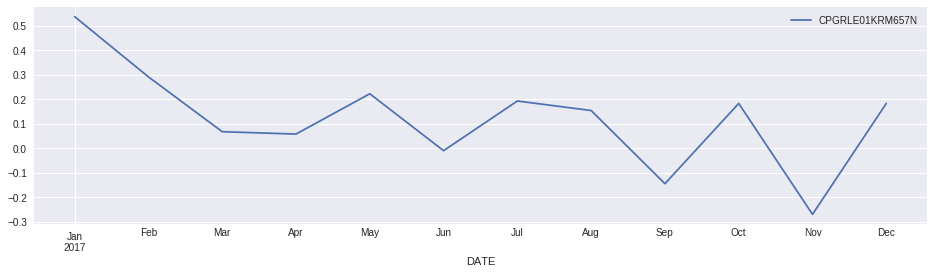

In [ ]:
df_kous.plot(figsize=(16,4))

### Fred 외의 정보 사이트는 아래와 같습니다.
* https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
![제공 정보 소스](http://hugrypiggykim.com/wp-content/uploads/2018/11/K-003.jpg)


#2. 한국은행 경제통계시스템 홈페이지
### http://ecos.bok.or.kr 홈페이지
![한국은행 경제통계](http://hugrypiggykim.com/wp-content/uploads/2018/11/K-001.jpg)


###https://goo.gl/8evOMi 코드표
![API 요청 코드 표](http://hugrypiggykim.com/wp-content/uploads/2018/11/K-006.jpg)

###인증키 발급
* 회원가입 후,
* 상단 메뉴에 '서비스 이용 -> 인증키 신청'

###통계지표 100개
정책수립 및 동향분석에 유용한 통계지표 100개

http://ecos.bok.or.kr/api/KeyStatisticList/sample/json/kr/1/10

###서비스 통계 목록
OpenAPI 통계목록

http://ecos.bok.or.kr/api/StatisticTableList/sample/json/kr/1/10

###통계 세부항목 목록
서비스대상 통계의 세부 통계항목

http://ecos.bok.or.kr/api/StatisticItemList/sample/json/kr/1/10/043Y062/

###통계 조회 조건 설정
데이터 이용을 위한 조회조건 설정방법(통계코드, 통계명, 세부항목명, 기간 등)

http://ecos.bok.or.kr/api/StatisticSearch/sample/json/kr/1/10/010Y002/MM/201101/201608/AAAA11/

###통계메타DB
한국은행에서 작성, 제공하는 15개 통계에 대한 이용자의 이해를 돕기 위한 통계 설명자료

http://ecos.bok.or.kr/api/StatisticMeta/sample/json/kr/1/10/경제심리/

###통계용어사전
경제 및 통계에 대한 전문용어를 알기쉽게 풀이한 사전 (총 803개의 용어)

http://ecos.bok.or.kr/api/StatisticWord/sample/json/kr/1/10/소비자/





### 사용 방법
한국은행은 Open API 를 제공하고 있습니다. 아래와 같이 규격에 맞춰 Restful API 를 요청하면, 데이터를 획득할 수 있습니다. 



In [ ]:
import pandas as pd
import requests
import json
from pandas.io.json import json_normalize

def query_ecos(stat_code, start_date, end_date, cycle_type="QQ"):
    auth_key = "sample/" #발급 받은 Key 를 넣으면 더 많은 데이터 수집 가능
    req_type = "json/"
    lang = "kr/"
    start_no = "1/"
    end_no ="10/"
    stat_code = stat_code + "/" 
    cycle_type = cycle_type + "/"
    start_date = start_date + "/"
    end_date = end_date + "/"
    item_no = ""

    url = "http://ecos.bok.or.kr/api/StatisticSearch/" +  \
        auth_key + req_type + lang + start_no + end_no + \
        stat_code + cycle_type + start_date + end_date + item_no

    r = requests.get(url)
    if '해당하는 데이터가 없습니다' in r.text:
        return None
    
    jo = json.loads(r.text)
    print(jo)
    df = json_normalize(jo['StatisticSearch']['row'])
    df['TIME'] = df['TIME'] + '0101'
    df['TIME'] = df['TIME'].str.replace(r'(\d{4})(\d{2})(\d{2})(.*)', r'\1-\2-\3')
    return df

In [ ]:
stat_code = "I01Y001"
cycle_type = "MM"
start_date = "2000"
end_date = "2018"

df = query_ecos(stat_code, start_date, end_date, cycle_type)
df.head()

{'StatisticSearch': {'list_total_count': 1512, 'row': [{'UNIT_NAME': '십억달러 ', 'STAT_NAME': '18.1.1 본원통화', 'ITEM_CODE1': 'AUS', 'STAT_CODE': 'I01Y001', 'ITEM_CODE2': ' ', 'ITEM_CODE3': ' ', 'ITEM_NAME1': '호주', 'ITEM_NAME2': ' ', 'DATA_VALUE': '29', 'ITEM_NAME3': ' ', 'TIME': '200001'}, {'UNIT_NAME': '10억위안', 'STAT_NAME': '18.1.1 본원통화', 'ITEM_CODE1': 'CHN', 'STAT_CODE': 'I01Y001', 'ITEM_CODE2': ' ', 'ITEM_CODE3': ' ', 'ITEM_NAME1': '중국', 'ITEM_NAME2': ' ', 'DATA_VALUE': '3192.5', 'ITEM_NAME3': ' ', 'TIME': '200001'}, {'UNIT_NAME': '10억위안', 'STAT_NAME': '18.1.1 본원통화', 'ITEM_CODE1': 'CHN', 'STAT_CODE': 'I01Y001', 'ITEM_CODE2': ' ', 'ITEM_CODE3': ' ', 'ITEM_NAME1': '중국', 'ITEM_NAME2': ' ', 'DATA_VALUE': '3224.1', 'ITEM_NAME3': ' ', 'TIME': '200002'}, {'UNIT_NAME': '10억유로', 'STAT_NAME': '18.1.1 본원통화', 'ITEM_CODE1': 'EMU', 'STAT_CODE': 'I01Y001', 'ITEM_CODE2': ' ', 'ITEM_CODE3': ' ', 'ITEM_NAME1': '유로지역', 'ITEM_NAME2': ' ', 'DATA_VALUE': '472.3', 'ITEM_NAME3': ' ', 'TIME': '200001'}, {'UNIT_N

,DATA_VALUE,ITEM_CODE1,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,ITEM_NAME3,STAT_CODE,STAT_NAME,TIME,UNIT_NAME
0,29,AUS,,,호주,,,I01Y001,18.1.1 본원통화,2000-01-01,십억달러
1,3192.5,CHN,,,중국,,,I01Y001,18.1.1 본원통화,2000-01-01,10억위안
2,3224.1,CHN,,,중국,,,I01Y001,18.1.1 본원통화,2000-02-01,10억위안
3,472.3,EMU,,,유로지역,,,I01Y001,18.1.1 본원통화,2000-01-01,10억유로
4,63839.3,JPN,,,일본,,,I01Y001,18.1.1 본원통화,2000-01-01,십억엔


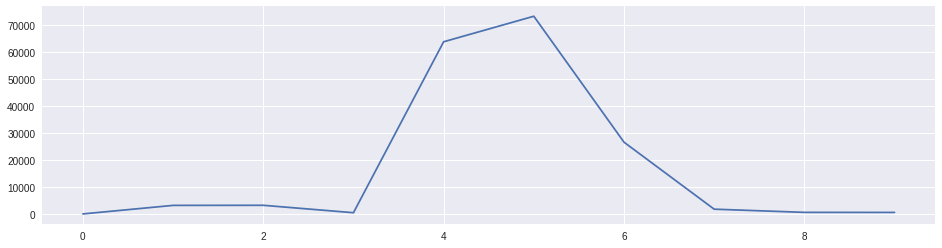

In [ ]:
df['DATA_VALUE'].astype(float).plot(figsize=(16,4))

#3. 개별 주식 종목 등 데이터 수집

![Finance Data Reader](https://i.imgur.com/r0YE5Xs.png)

###종목 코드
* 거래소별 전체 종목코드: KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500

###가격 데이터
* 해외주식 가격 데이터: AAPL(애플), AMZN(아마존), GOOG(구글) 등
* 국내주식 가격 데이터: 005930(삼성전자), 091990(셀트리온헬스케어) 등
* 각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)
* 환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율
* 암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)

In [ ]:
!pip install -U finance-datareader
!pip install html5lib 

Requirement already up-to-date: finance-datareader in /usr/local/lib/python3.6/dist-packages (0.6.0)


###종목 전체 보기

![종목 전체 보기 코드](http://hugrypiggykim.com/wp-content/uploads/2018/11/K-007.jpg)


In [ ]:
import FinanceDataReader as fdr

# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head(10)

,Symbol,Name,Sector,Industry
0,001040,CJ,기타 금융업,지주회사
1,011150,CJ씨푸드,기타 식품 제조업,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입"
2,012630,HDC,건물 건설업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업"
3,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
4,001390,KG케미칼,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제"
5,010060,OCI,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매"
6,002360,SH에너지화학,기초 화학물질 제조업,"합성수지(PS/EPS,ABS수지) 제조"
7,001740,SK네트웍스,기타 전문 도매업,"종합무역업(전자전기제품,섬유,에너지화학제품,철강금속제품),의류,수입산합판,MDF판매..."
8,011810,STX,상품 종합 도매업,"에너지 원료(석탄,석유),산업기자재(기계부품) 도매"
9,071970,STX중공업,일반 목적용 기계 제조업,"조선기자재, 기계부품, 엔진산업환경발전설비, 플랜트(EPC)"


###개별 종목 가지고 오기
위에서 검색한 Symbol 명과 기간만 바꿔 주시면 됩니다. 데이터는 시작가, 종가 등 일반적인 데이터를 포함합니다.

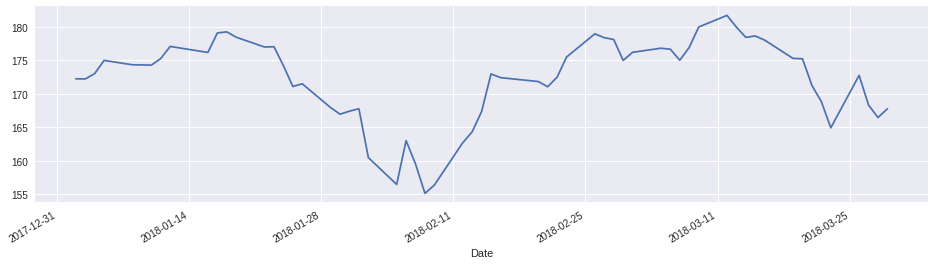

In [ ]:
import FinanceDataReader as fdr

# Apple 종가
df = fdr.DataReader('AAPL', '2018-01-01', '2018-03-30')
df['Close'].plot(figsize=(16,4))

###재무제표 가지고 오기
놀랍게도, 네이버 파이낸스에서 간단하게 각 기업의 재무제표까지 가지고 올 수 있다. 
![대체 텍스트](http://hugrypiggykim.com/wp-content/uploads/2018/11/bE7Zqb7.png)

In [ ]:
!pip install openpyxl
!pip install xlrd

    100% |████████████████████████████████| 112kB 2.5MB/s 


### 네이버 파이낸스에서 크롤링하기 위한 메서드

In [ ]:
import re
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize

def naver_finstate_detail(cmp_cd, rpt='0', frq='1', finGubun='IFRSL'):
    '''
    네이버 파이낸스로 부터 상세재무제표를 읽어온다
    * cmp_cd:  # 종목코드: '005930'
    * rpt='0' # 종류: '0'=손익계산서(기본값), '1'=재무상태표, '2'=현금흐름표
    * frq='1' # 기간: '0'=연간, '1'=분기(기본값)
    * finGubun='IFRSL' # 구분: 'MAIN'=주재무제표, 'IFRSS'=KIFRS별도, 'IFRSL'=IFRS연결(기본값), 'GAAPS'=GAAP개별, 'GAAPL'=GAAP연결
    '''

    # encparam 가져오기
    url = 'http://companyinfo.stock.naver.com/v1/company/c1030001.aspx?cmp_cd=005930'
    html_text = requests.get(url).text
    encparam = re.findall ("encparam: '(.*?)'", html_text)[0]

    url_tmpl = 'http://companyinfo.stock.naver.com/v1/company/cF3002.aspx?' \
                    'cmp_cd={cmp_cd}&frq={frq}&rpt={rpt}&finGubun={finGubun}&frqTyp={frq}&cn=&encparam={encparam}'  

    url = url_tmpl.format(cmp_cd=cmp_cd, frq=frq, rpt=rpt, finGubun=finGubun, frqTyp=frq, encparam=encparam)

    # 페이지 가져오기
    headers={'Referer': url}
    jo = json.loads(requests.get(url, headers=headers).text)
    
    # DataFrame 생성
    df = json_normalize(jo, 'DATA')

    # DATA1~DATA6 컬럼 이름 바꾸기 
    jo_yymm = jo['YYMM'][:6]
    date_str_list = []
    for yymm in jo_yymm:
        m = re.search('(\d{4}/\d{0,2}).*', yymm)
        date_str_list.append(m.group(1) if m else '') 
    data_n_list = ['DATA' + str(i) for i in range(1,7)]
    yymm_cols = zip(data_n_list, date_str_list)
    cols_map = dict(yymm_cols)
    df.rename(columns=cols_map, inplace=True)
    df['ACC_NM'] = df['ACC_NM'].str.strip().replace('[\.*\[\]]', '', regex=True)
    df.set_index(['ACCODE', 'ACC_NM'], inplace=True)
    df = df.iloc[:, 1:7] # 날짜 컬럼만 추출
    df = df.T # Transpose (컬럼, 인덱스 바꾸기)
    df.index = pd.to_datetime(df.index)
    df.index.name = '날짜'
    return df

### 전체 종목을 가지고 오는 코드 (현재 10개로 지정)

In [ ]:
import pandas as pd
import itertools

krx_list = fdr.StockListing('KRX')

frq_list = [('0', '연간'), ('1', '분기') ] 
rpt_list = [('0', '손익계산서'), ('1', '재무상태표'), ('2', '현금흐름표')]

for ix, row in krx_list[:10].iterrows():  # 10종목만 시행
    fn = "%s_%s_재무제표.xlsx" % (row['Symbol'], row['Name'])
    print(fn)
    writer = pd.ExcelWriter(fn)
    for frq, rpt in itertools.product(frq_list,  rpt_list):
        df = naver_finstate_detail(row['Symbol'], rpt=rpt[0], frq=frq[0])
        df.to_excel(writer, sheet_name=rpt[1] + '_' + frq[1])
    writer.save()

001040_CJ_재무제표.xlsx
011150_CJ씨푸드_재무제표.xlsx
012630_HDC_재무제표.xlsx
082740_HSD엔진_재무제표.xlsx
001390_KG케미칼_재무제표.xlsx
010060_OCI_재무제표.xlsx
002360_SH에너지화학_재무제표.xlsx
001740_SK네트웍스_재무제표.xlsx
011810_STX_재무제표.xlsx
071970_STX중공업_재무제표.xlsx


### 다운로드한 재무표 확인(CJ 푸드)

In [ ]:
df_is = pd.read_excel('001040_CJ_재무제표.xlsx', sheet_name='손익계산서_분기', header=[0,1], index_col=[0])
df_is

ACCODE,200000,200010,200020,200040,200070,200100,200130,200160,200170,200220,...,203380,203390,203400,292200,292300,203530,203540,203550,203560,203570
ACC_NM,매출액(수익),내수,수출,제품매출액,상품매출액,제품상품매출액,공사수익,분양수익,용역수익,지분법이익,...,(지배주주지분)주당순이익,(지배주주지분)희석주당계속사업이익,(지배주주지분)희석주당순이익,EBITDA,EBIT,구영업외수익(K-GAAP),구영업외비용(K-GAAP),구경상이익(2006년이전발생),구특별이익(2006년이전발생),구특별손실(2006년이전발생)
날짜,,,,,,,,,,,,,,,,,,,,,
2017-06-01,65049.535500,NaN,NaN,NaN,NaN,36053.833780,1008.45399,NaN,24009.80457,NaN,...,NaN,NaN,NaN,10392.67207,6735.48347,5929.82525,2170.61717,NaN,NaN,NaN
2017-09-01,70650.544760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10005.62874,6197.94070,4645.67055,2766.37770,NaN,NaN,NaN
2017-12-01,69788.778320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7031.88874,3110.07508,1805.10023,4101.07750,NaN,NaN,NaN
2018-03-01,69741.594380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6529.19640,2475.65880,1511.47270,2451.19282,NaN,NaN,NaN
2018-06-01,70625.402000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15397.12198,11488.52486,11700.79841,3204.19520,NaN,NaN,NaN
2018-09-01,75751.166667,NaN,NaN,NaN,NaN,75751.166667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. 뉴스 데이터 수집 
별도의 API 나 라이브러리가 제공되지 않는 상황에서 사이트 구조를 분석해서 원하는

데이터를 수집 동아일보를 대상으로 하였으며, 대강 직접 만든 것이라 애러가 날 수도 있다

![대체 텍스트](http://hugrypiggykim.com/wp-content/uploads/2018/11/다운로드.png)

In [ ]:
!pip install lxml
# 필요 패키지 설치
! pip install -q feedparser# 자바 설치, 버전확인
! apt-get install -q default-jre
! java -version
! pip install -q newspaper3k
! pip install -q konlpy
! pip install -q wordcloud
# 자바 설치, 버전확인
! apt-get install -q default-jre
! java -version
# 폰트 설치
! apt-get install fonts-nanum fonts-nanum-coding fonts-nanum-extra


Invalid requirement: 'feedparser#'
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/packaging/requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pyparsing.py", line 1654, in parseString
    raise exc
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pyparsing.py", line 1644, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pyparsing.py", line 1402, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pyparsing.py", line 3417, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pyparsing.py", line 1406, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "/usr/local/lib

In [ ]:
import sys
from bs4 import BeautifulSoup
import urllib.request
from urllib.parse import quote
import requests
from google.colab import files
import pandas as pd
import codecs

### 파라메터 설정
* keyword : 검색할 키워드 정의
* page_num : 가지고올 페이지 수 1 = 15건 
* output_file_name : 출력할 파일 명

In [ ]:
keyword = '우리은행 지주사 회장'
page_num = int(1)
output_file_name = 'article_test_004.csv'


###동아일보 뉴스 크롤링

In [ ]:

 
TARGET_URL_BEFORE_PAGE_NUM = "http://news.donga.com/search?p="
TARGET_URL_BEFORE_KEWORD = '&query='
TARGET_URL_REST = '&check_news=1&more=1&sorting=3&search_date=1&v1=&v2=&range=3'
 
 
# 기사 검색 페이지에서 기사 제목에 링크된 기사 본문 주소 받아오기
def get_link_from_news_title(page_num, URL, output_file):
    for i in range(page_num):
        current_page_num = 1 + i*15
        position = URL.index('=')
        URL_with_page_num = URL[: position+1] + str(current_page_num) \
                            + URL[position+1 :]
        
        try : 
          source_code_from_URL = urllib.request.urlopen(URL_with_page_num)
          #source_code_from_URL = requests.get(URL_with_page_num)
        except Exception as e : 
          print(e)

        soup = BeautifulSoup(source_code_from_URL, 'lxml')
        
        for title in soup.find_all('p', 'tit'):
            title_link = title.select('a')
            article_URL = title_link[0]['href']
            get_text(article_URL, output_file)
 
 
# 기사 본문 내용 긁어오기 (위 함수 내부에서 기사 본문 주소 받아 사용되는 함수)
def get_text(URL, output_file):
    source_code_from_url = urllib.request.urlopen(URL)
    print(URL)
    soup = BeautifulSoup(source_code_from_url, 'lxml', from_encoding='utf-8')
    content_of_article = soup.select('div.article_txt')
    try : 
      output_file.write(soup.find_all('h2',{'class' : 'title'})[0].text.replace(",",""))
    except Exception as e : 
      output_file.write('제목없음')
    output_file.write(',')
    for item in content_of_article:
        string_item = str(item.find_all(text=True))
        output_file.write(string_item.replace(",",""))
    output_file.write('\n')
    
target_URL = TARGET_URL_BEFORE_PAGE_NUM + TARGET_URL_BEFORE_KEWORD \
         + quote(keyword) + TARGET_URL_REST

with codecs.open(output_file_name, 'w','euckr') as output_file :
  output_file.write('title,content\n')
  get_link_from_news_title(page_num, target_URL, output_file)


pd.read_csv(output_file_name, sep=',', encoding='euckr')
 

http://news.donga.com/3/all/20170110/82313224/1
http://news.donga.com/3/all/20100325/27106873/1
http://news.donga.com/3/all/20170412/83832301/1
http://news.donga.com/3/all/20130602/55588701/1
http://news.donga.com/3/all/20181106/92760070/1
http://news.donga.com/3/all/20180705/90907476/1
http://news.donga.com/3/all/20170104/82185780/1
http://news.donga.com/3/all/20130506/54951085/1
http://news.donga.com/3/all/20130621/56012993/1
http://news.donga.com/3/all/20130602/55588715/1
http://news.donga.com/3/all/20100706/29686681/1
http://news.donga.com/3/all/20140114/60170647/1
http://news.donga.com/3/all/20181025/92592831/1
http://news.donga.com/3/all/20171103/87091397/1
http://news.donga.com/3/all/20180107/88062011/1


,title,content
0,수장 교체… 지주사 전환… 금융권 새해 지각변동,['\n' '신한금융 차기 회장후보 4명 압축… 우리銀 ‘민선 1기 선장’ 뽑기 돌...
1,금융지주사 이사회 의장 윤곽… 지배구조 변화 관심,['\n' 'KB금융 이경재 씨 내정' '\n국민銀 구태진 씨 선임' '\n우리銀 ...
2,신상훈 “우리은행 지주사 전환 방향은 맞다”,['\n' '신상훈 前 신한금융지주 사장 우리은행 사외이사로 금융권 복귀' '\n'...
3,우리은행 “강덕수 ㈜STX 담보주식 처분하겠다”,['\n' '姜회장 지배력 위기… 그룹 해체수순 밟나 “지주체제 흔들지 마라”' '...
4,우리銀 회장-행장 1년 겸직 유력,['\n' '정부 ‘한시 겸직 바람직’ 제시할듯… 7일 지주사 전환 인가여부 결정'...
5,[IR 리포트]우리銀 차세대 전산시스템 도입으로 디지털 역량 강화,['\n' '‘위니’ 한달간 안정화 거쳐 정상화… “금융지주사 도약의 초석 놓은것”...
6,“민영 첫 우리은행장은 외부서 수혈 안한다”,['\n' '첫 이사회서 내부출신 선임 공식화' '\n \u30...
7,STX지주사에 2000억 긴급 수혈,['\n' '채권단 “자율협약 동의쪽으로 가닥”' '\n STX...
8,이순우 우리금융회장 “계열사 사장 낙하산 인사 안하겠다”,['\n' '이순우 신임 우리금융회장 포부 밝혀' '\n' '“은행 지점장에 대한 ...
9,신제윤 금융위장 “우리금융 매각에 필요하다면 지주사 체제 고집할 필요없어”,['\n' '‘은행중심 재편’ 밝혀' '\n 금융위원회가 공적자...


### 수집한 데이터 빈도 분석 및 시각화

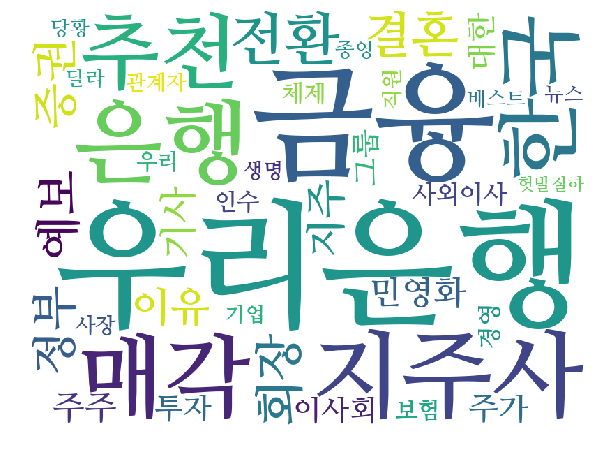

In [ ]:
import feedparser
import newspaper
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def draw_wordcloud_from_rss():

    df = pd.read_csv(output_file_name, sep=',', encoding='euckr')
    
    news_text = ''.join(list(df['content']))
    # konlpy, Okt: 형태소 분석을 통해 본문에서 명사추출, 1글자는 단어는 삭제
    engine = Okt() 
    nouns = engine.nouns(news_text)
    nouns = [n for n in nouns if len(n) > 1]

    # Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 40개
    count = Counter(nouns)
    tags = count.most_common(40)

    # WordCloud, matplotlib: 단어 구름 그리기
    font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
    wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    
# 한국경제 뉴스 (주식) RSS
output_file_name = 'article_test_005.csv'
draw_wordcloud_from_rss()


# 기타 : 그외 금융 데이터를 제공하는 Open Site 정보 정리


## 경제, 금융투자 주요 사이트와 데이터
한국거래소
* http://krx.co.kr

전자공시
* http://dart.fss.or.kr

한국은행
* http://www.bok.or.kr
* http://www.bokeducation.or.kr/ 한국은행 경제교육

KDI 한국개발연구원 
* http://www.kdi.re.kr
* http://lib.kdi.re.kr/nonRelation/statDomestic
* 경제, 정치, 사회, 외교 보고서 논문

코트라 글로벌 뉴스
* http://news.kotra.or.kr/kotranews/index.do - 해외시장뉴스
* 수출, 무역 보고서

ICT 통계포털
* http://itstat.go.kr
* IT, ICT 분야 통계

한국신용평가 기업정보
* http://www.kisline.com/
* 한신평에서 제공하는 기업정보 (기관인증 후 개인별 회원가입)

국가통계포털
* http://kosis.kr
* 국내, 국제, 북한 통계

석유정보망
* http://www.petronet.co.kr
* 석유 관련 국내외 정보 및 보고서

한국무역통계 진흥원, TRASS(트라스)
* http://trass.kctdi.or.kr/
* 관세청의 월별 수출입 무역통계
* 수출입 통계, 자사실적, 통관정보

고용노동부, 고용 및 노동 통계 포털
* http://laborstat.molab.go.kr
* 주제별, 조사별 통계 및 패널 데이터

한국문화관광연구원, 관광지식정보시스템
* http://www.tour.go.kr
* 출입국통계, 국민여행실태조사, 외래관광객실태조사, 연구보고 자료

한국교육개발원, 교육통계 포털
* http://std.kedi.re.kr/
* 교육기본통계, 취업통계, 평생교육통계, 평생학습개인상태 데이터

에너지경제연구원
* http://www.kesis.net/
* 석유, 가스 등 에너지자원 전 부문의 월별 통계

국토교통부, 국토 교통 통계 포털
* https://stat.molit.go.kr
* 국토, 도시, 교통 및 물류, 항공, 도로 및 철도 통계

문화셈터
* http://stat.mcst.go.kr
* 문화체육관광부 기본 통계 및 산하기관 통계

방송통신광고통계시스템
* https://adstat.kobaco.co.kr
* 방송통신광고비조사, 광고산업통계

보건복지데이터 포탈
* https://data.kihasa.re.kr
* 한국보건사회연구원의 마이크로 및 매크로 연구 데이터 

삼성경제연구소
* http://www.seri.org
* 다양한 경제 연구 보고서 (기업관점, 시장 관점)

대외경제정책연구원
* http://www.kiep.go.kr
* 대외경제정책 혹은 국제경제 정세관련 전문 보고서

한국은행, 한국은행경제통계시스템
* https://ecos.bok.or.kr 
* 한국 거시경제관련 통계
* 한국은행이 작성한 금융 관련 국가기본통계

무역협회
* http://stat.kita.net
* 국내외 수출입 통계, 무역통계 전문 DB

IMF DATA
* https://www.imf.org/data
* 세계 경제 관련 통계

 OECD data
* https://data.oecd.org
* 세계 경제 관련 통계

유럽공공데이터 포탈
* http://data.europa.eu/euodp 
* https://ec.europa.eu/eurostat Eurostat
* 유럽지역 관련 통계

센서스 - 미국관련 통계
* http://www.census.gov
* 여러 국가의 신용평가 등급, 환율, 국제경제지표 및 전망


## 투자정보 제공
에프엔 가이드
* http://www.fnguide.com
* 주식, 채권, 파생상품에 대한 정보 (회원)

와이즈 에프엔
* http://www.wisefn.com
* 주식, 채권, 파생상품에 대한 정보 (=네이버 증권)

아이투자
* http://itooza.com
* 유료 회원제, 다양한 데이터, 10년 상세 재무 데이터

증권플러스 인사이트
* http://insight.stockplus.com/
* 퀄리티 높은 분석 아티클들


## 지표
* 100대 통계지표 https://ecos.bok.or.kr/jsp/vis/keystat
* 국가통계포탈 100대 지표 http://kosis.kr/conts/nsportalStats/nsportalStats_0101Body.jsp?menuId=all
* 해외 주요 지표 사항 및 예상 : http://www.forexfactory.com/
* S&P 500 Map ttps://finviz.com/map.ashx
* https://www.msci.com/

## 포탈
* 네이버 증권 : http://stock.naver.com
* DAUM 증권 : http://finance.daum.net/
* 팍스넷 : http://paxnet.moneta.co.kr
* 씽크풀 : http://www.thinkpool.com


## 포탈, 뉴스 (해외)
* 구글 파이낸스 : http://finance.google.com
* 야후 파이낸스 : http://finance.yahoo.com
* 블룸버그 : http://bloomberg.com/markets
* CNN Money : http://money.cnn.com/
* 로이터 : http://reuters.com
